#Overview

[Building Demand Forecasting with BigQuery ML](https://www.cloudskillsboost.google/focuses/16547?parent=catalog)

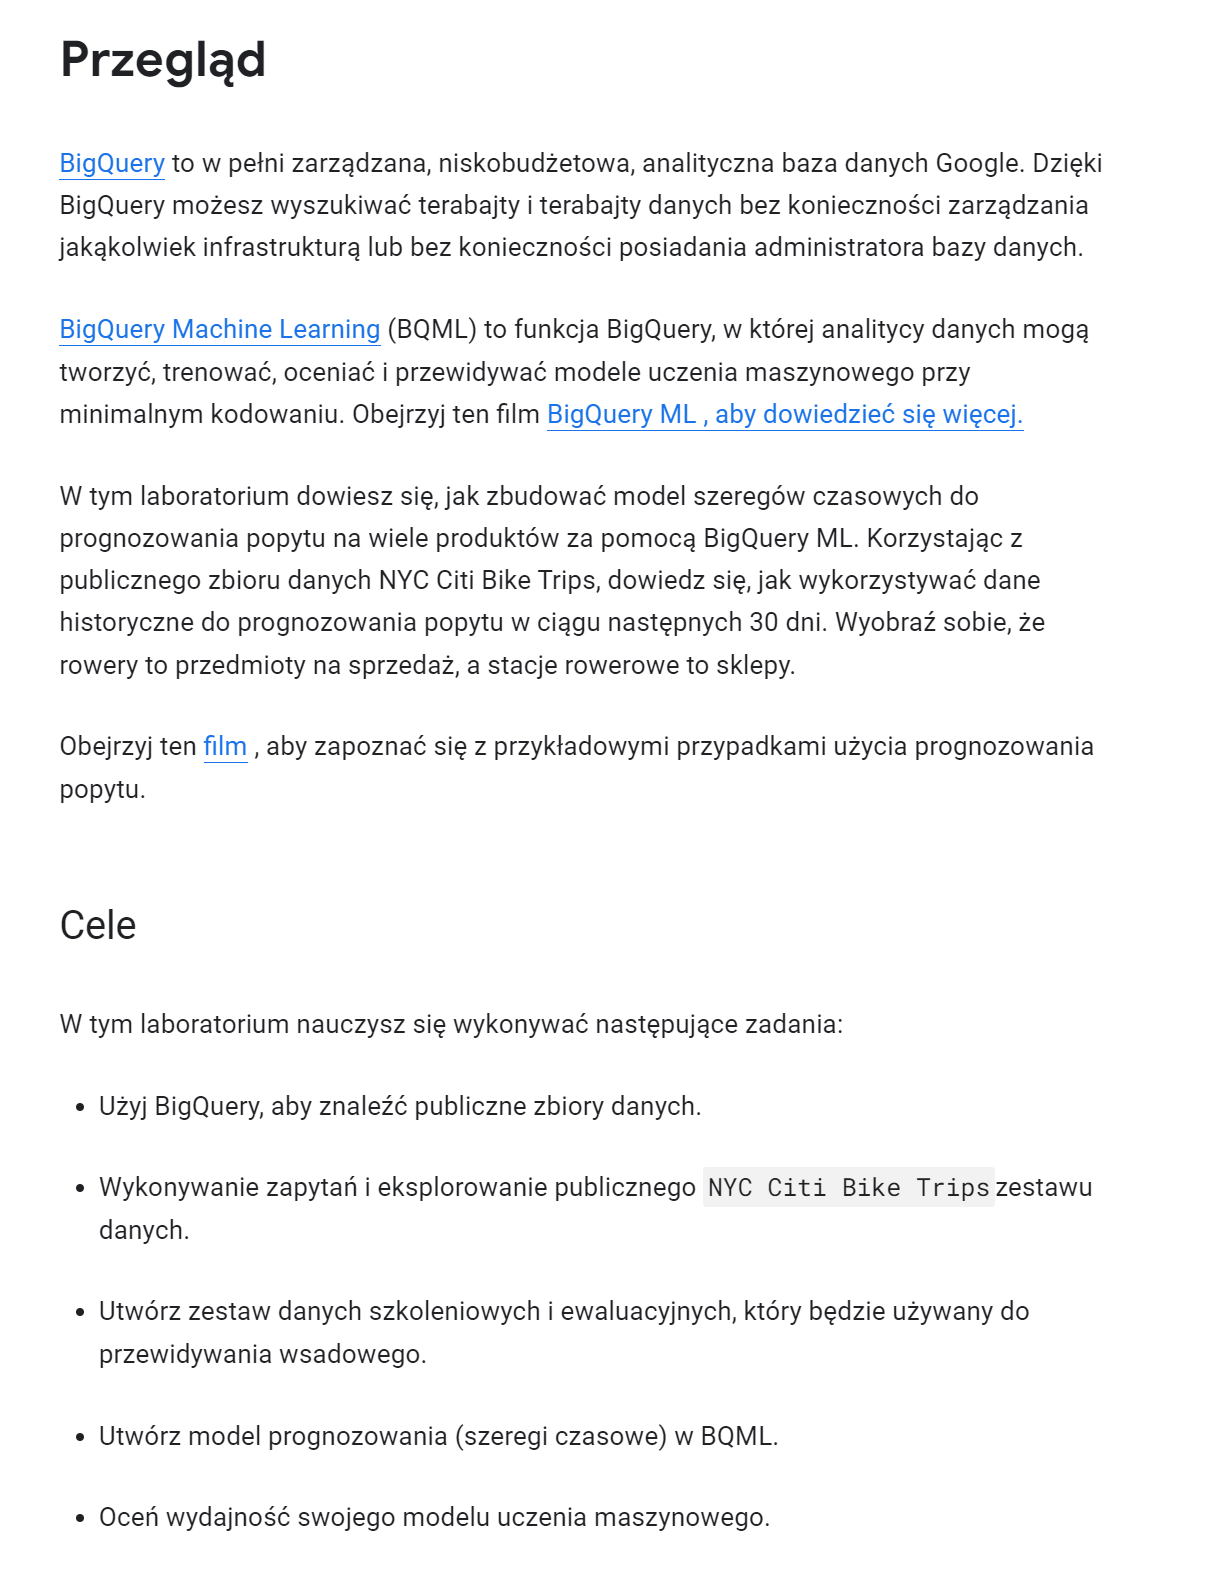

#Task 1. Explore the NYC Citi Bike Trips dataset

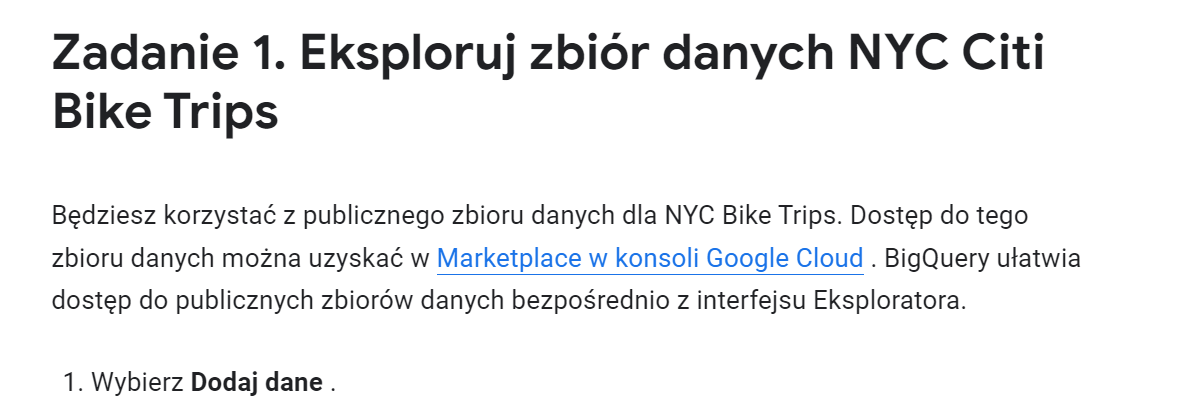

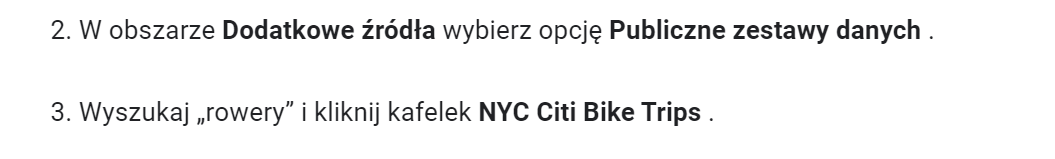

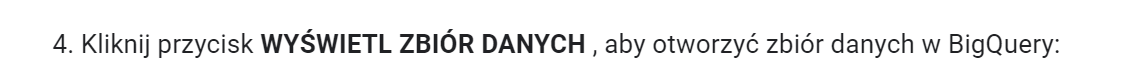

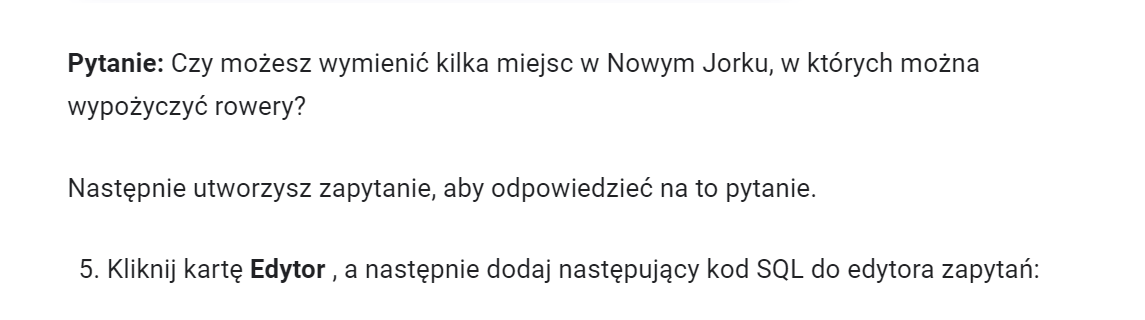

In [ ]:
%%bigquery

SELECT
   bikeid,
   starttime,
   start_station_name,
   end_station_name,
FROM
  `bigquery-public-data.new_york_citibike.citibike_trips`
WHERE starttime is not null
LIMIT 5

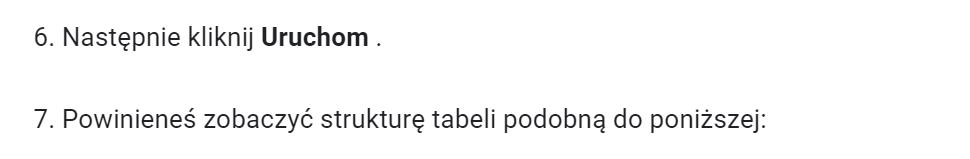

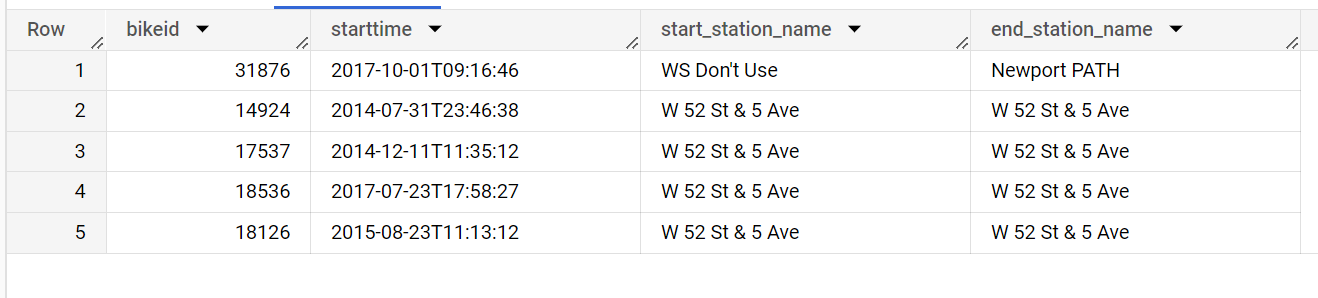

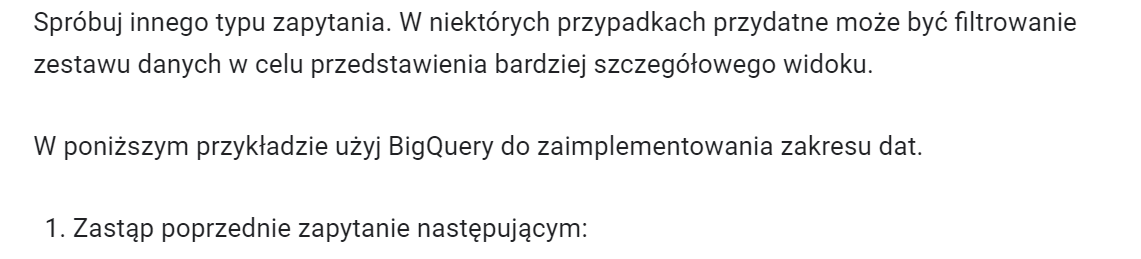

In [ ]:
%%bigquery

SELECT
  EXTRACT (DATE FROM TIMESTAMP(starttime)) AS start_date,
  start_station_id,
  COUNT(*) as total_trips
FROM
 `bigquery-public-data.new_york_citibike.citibike_trips`
WHERE
   starttime BETWEEN DATE('2016-01-01') AND DATE('2017-01-01')
GROUP BY
    start_station_id, start_date
LIMIT 5

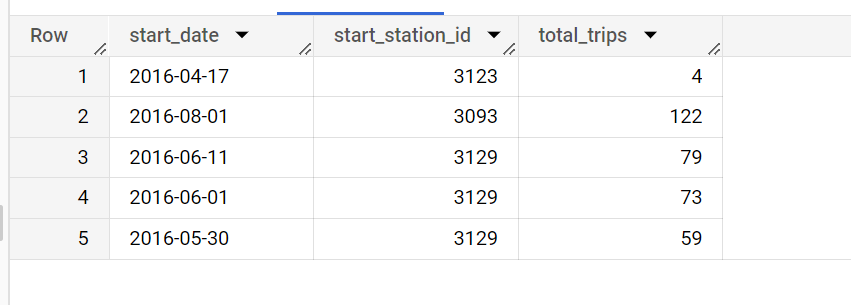

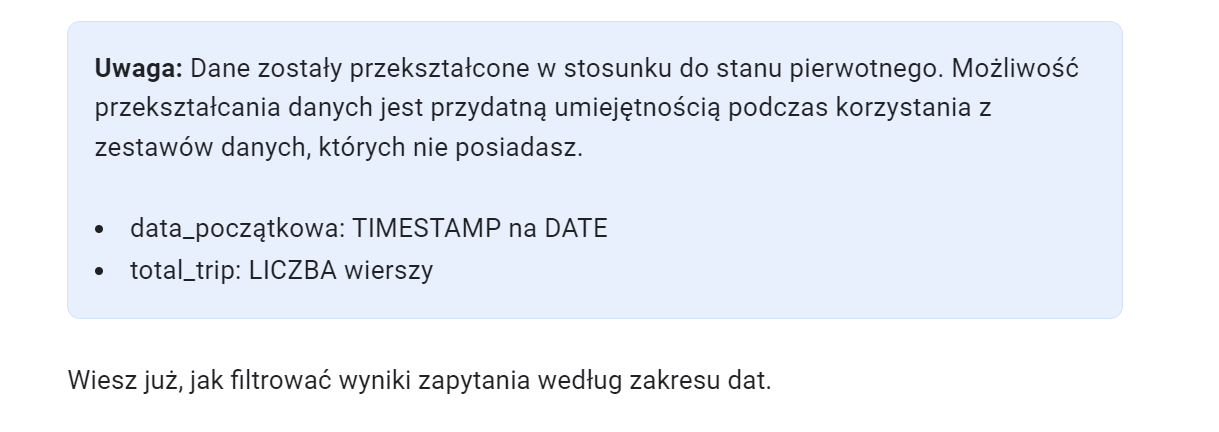

#Task 2. Cleaned training data

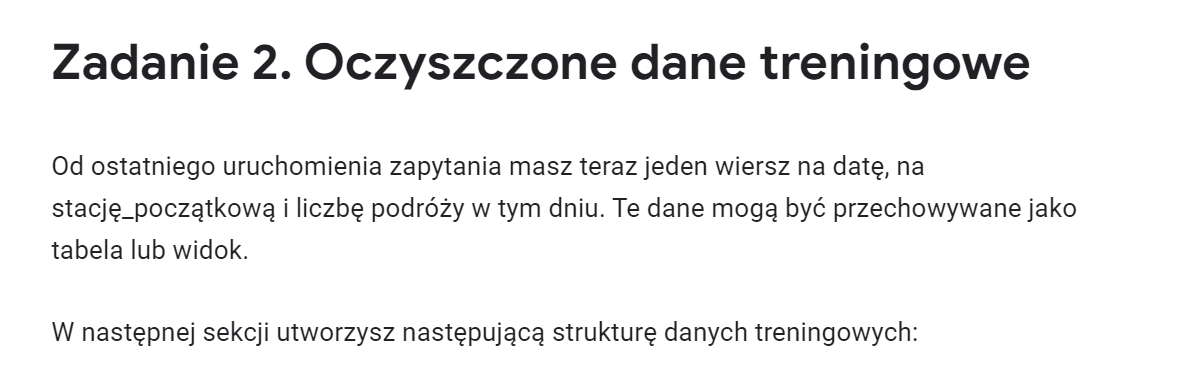

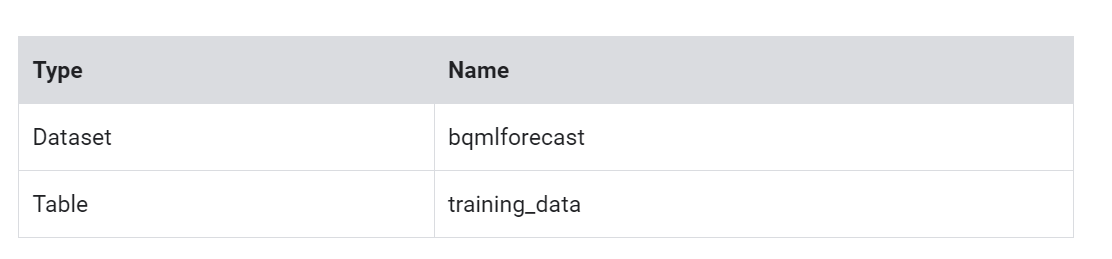

In [ ]:
# bqmlforecast

# training_data

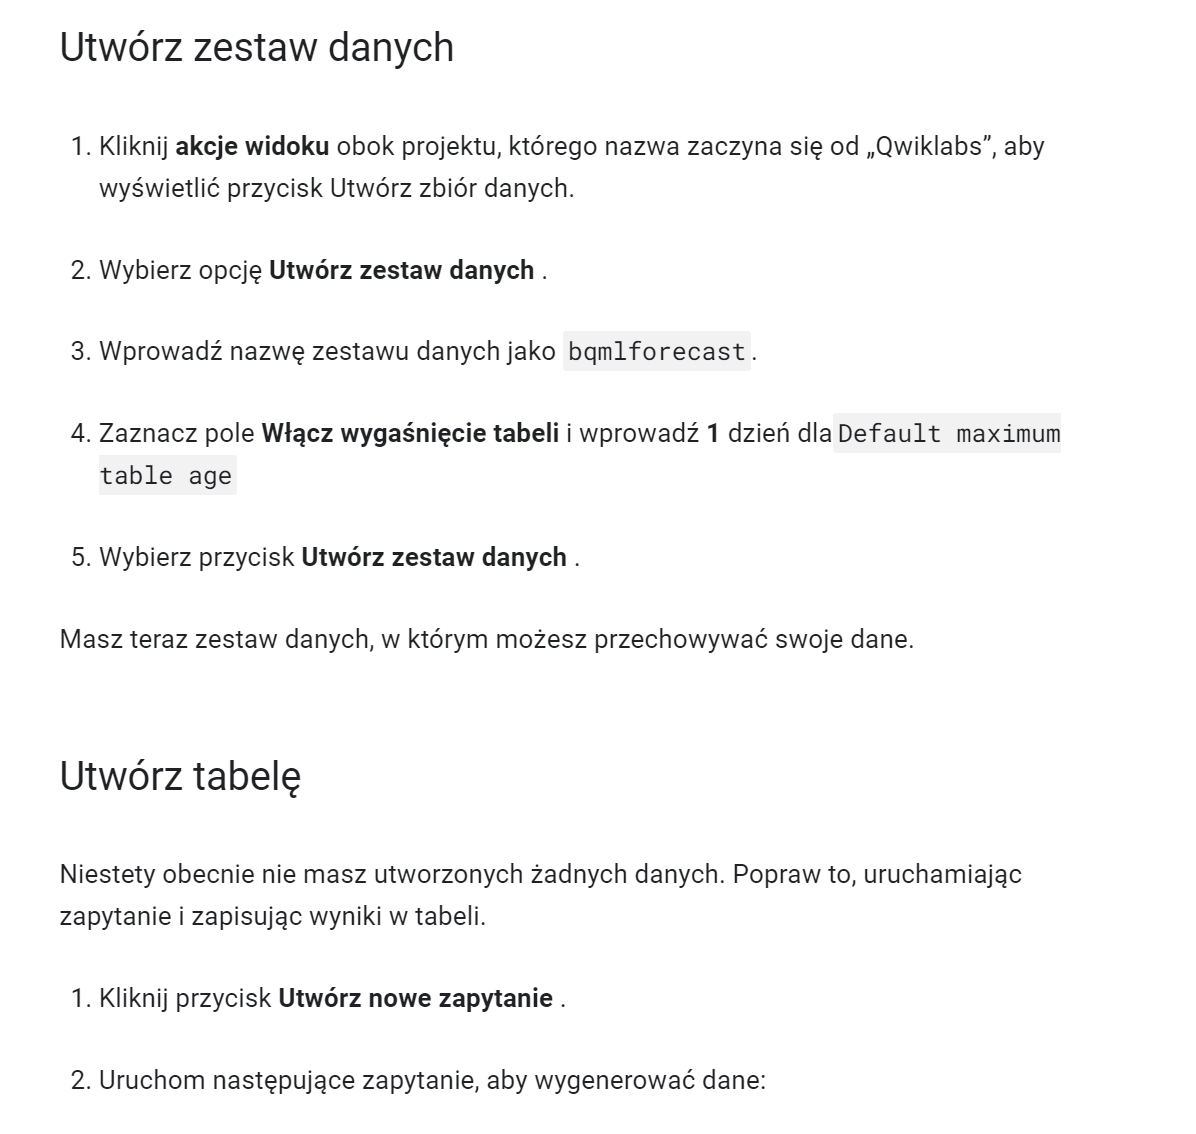

In [ ]:
%%bigquery

SELECT
 DATE(starttime) AS trip_date,
 start_station_id,
 COUNT(*) AS num_trips
FROM
 `bigquery-public-data.new_york_citibike.citibike_trips`
WHERE
 starttime BETWEEN DATE('2014-01-01') AND ('2016-01-01')
 AND start_station_id IN (521,435,497,293,519)
GROUP BY
 start_station_id,
 trip_date

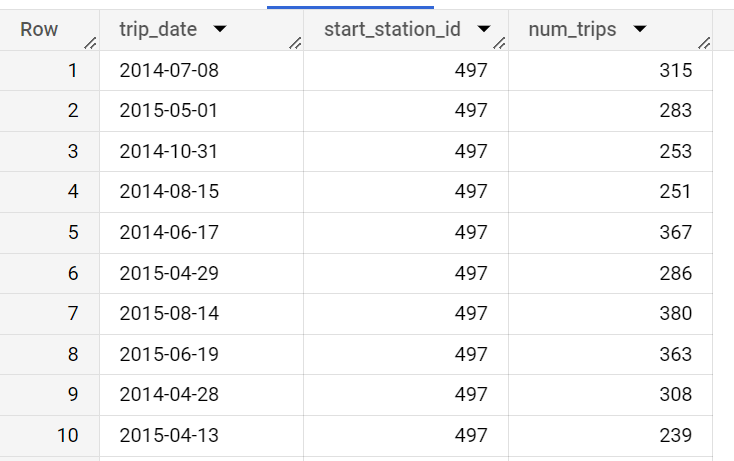

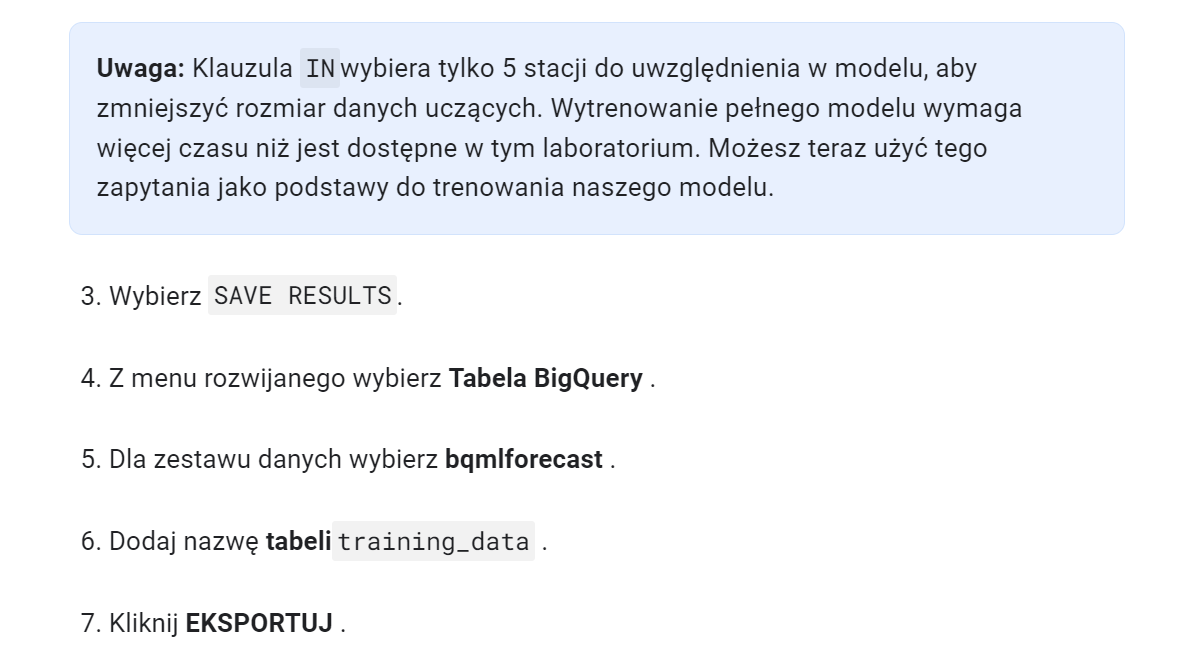

#Task 3. Training a model

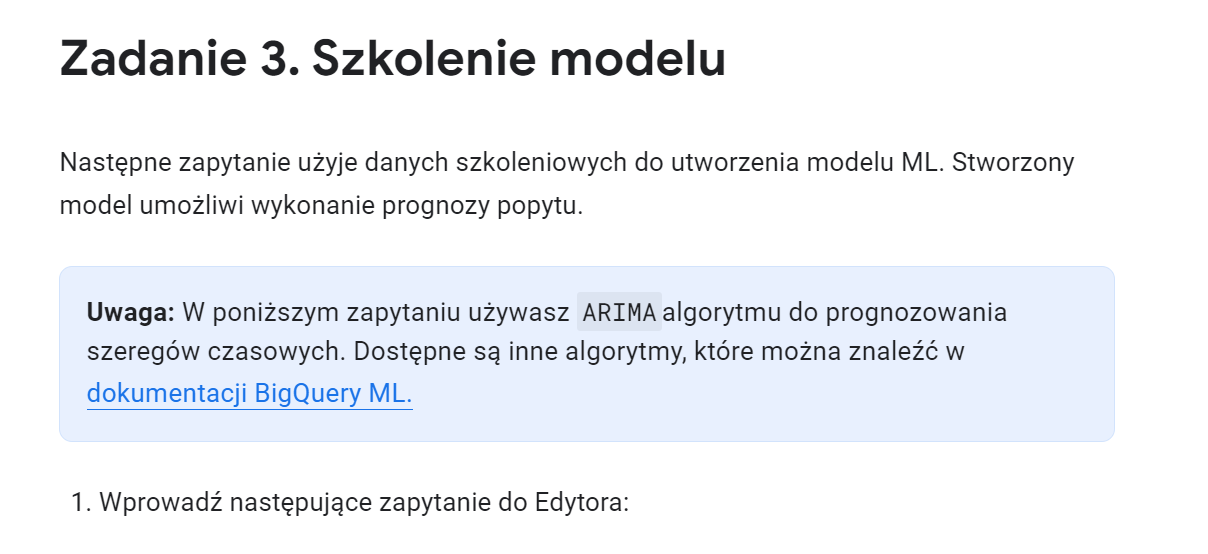

https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-create

In [ ]:
%%bigquery

CREATE OR REPLACE MODEL bqmlforecast.bike_model
  OPTIONS(
    MODEL_TYPE='ARIMA',
    TIME_SERIES_TIMESTAMP_COL='trip_date', # data
    TIME_SERIES_DATA_COL='num_trips', # dane do predykcji
    TIME_SERIES_ID_COL='start_station_id', # wymiary
    HOLIDAY_REGION='US'
  ) AS

  SELECT
    trip_date,
    start_station_id,
    num_trips
  FROM
    bqmlforecast.training_data

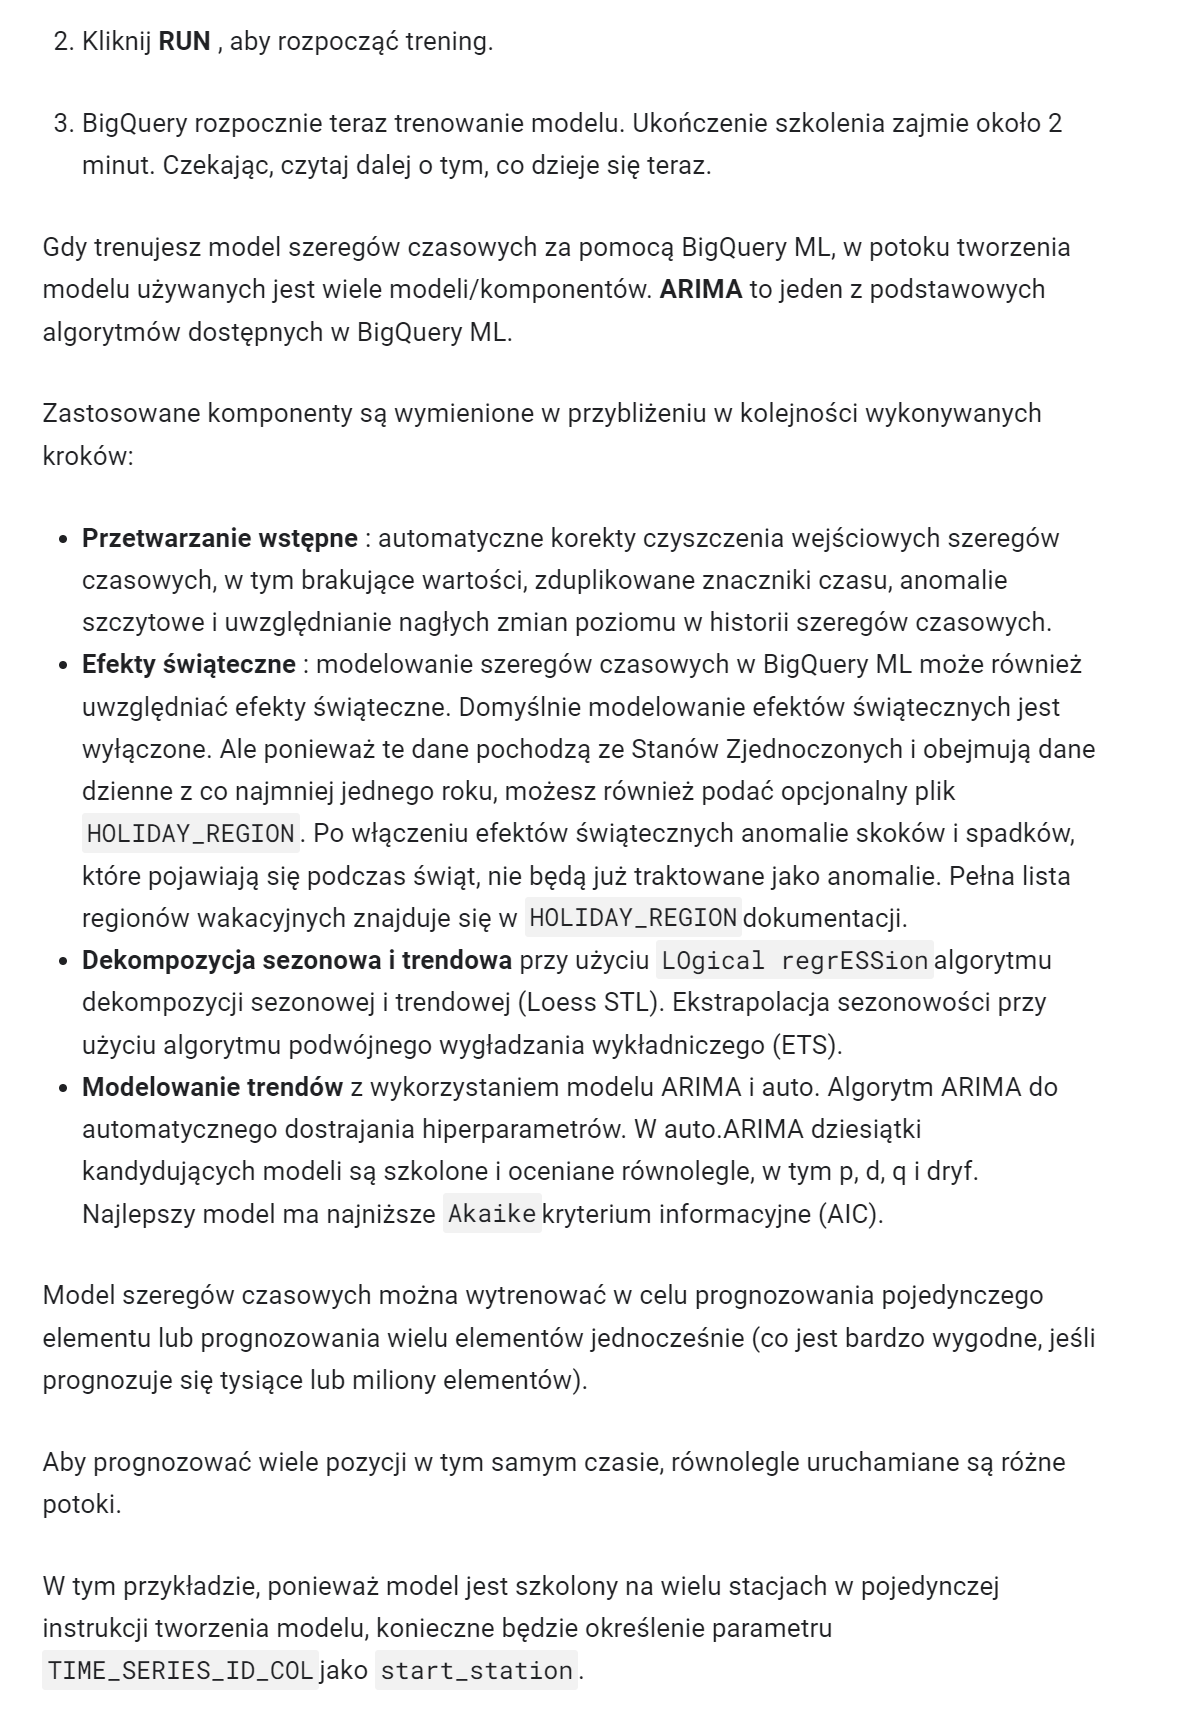

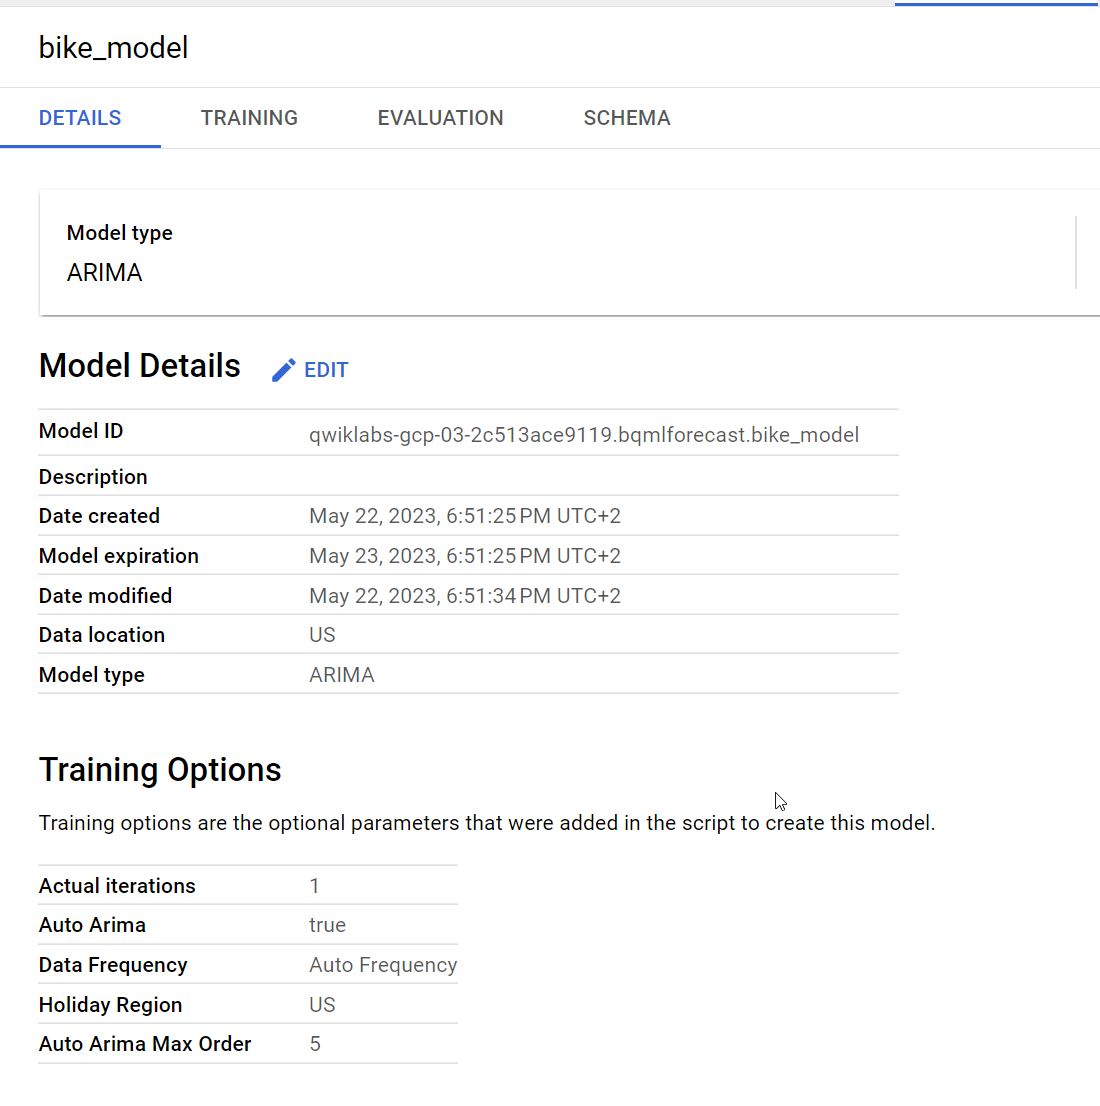

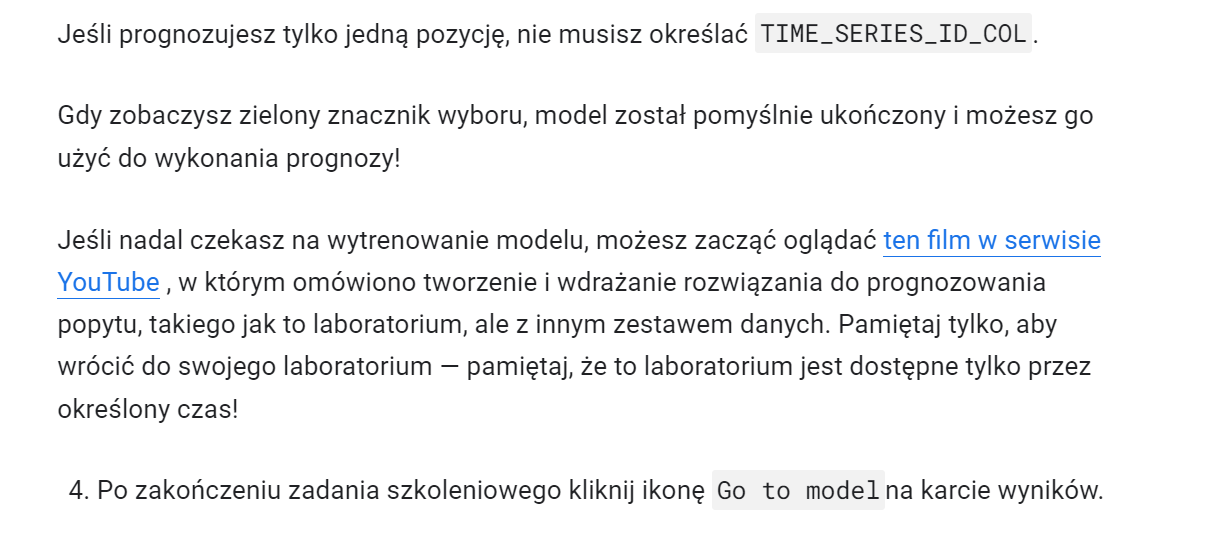

https://www.youtube.com/watch?v=dwOt68CevYA

#Task 4. Evaluate the time series model

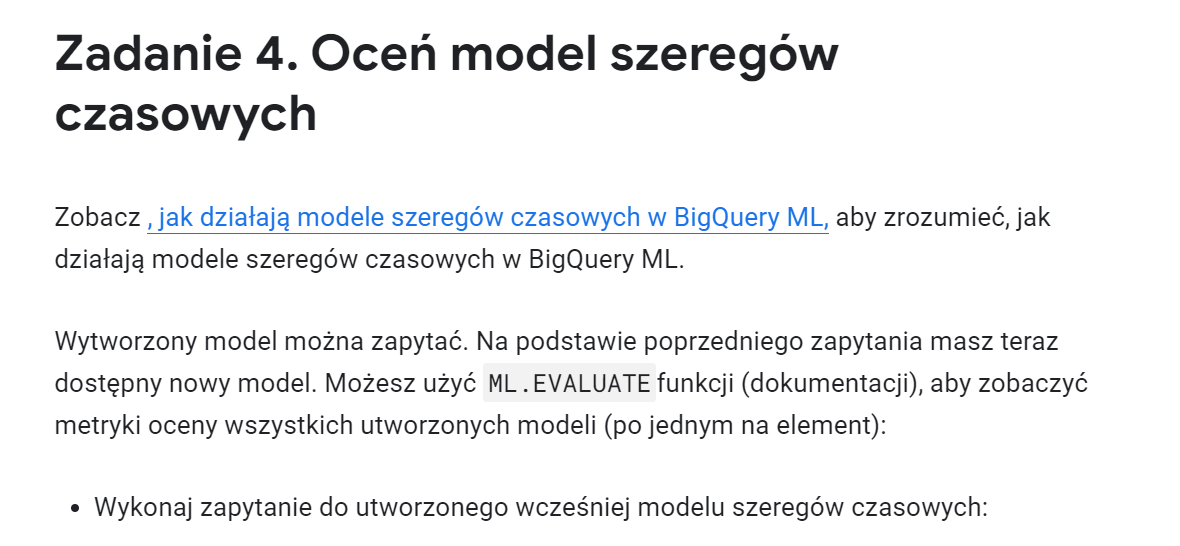

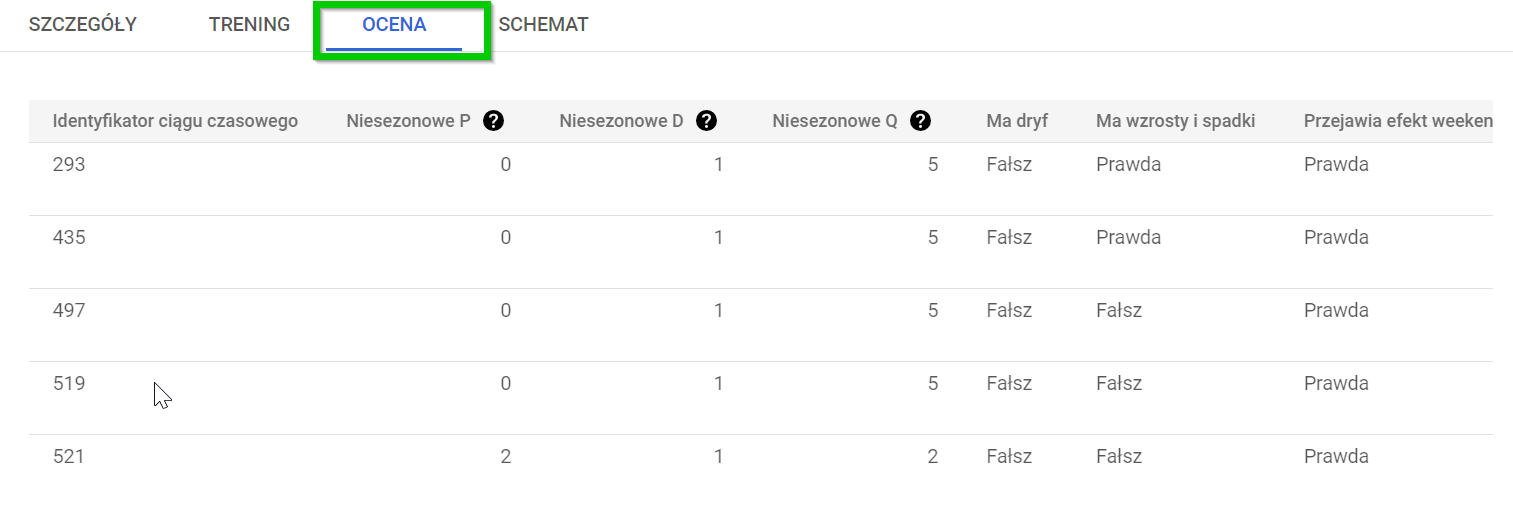

In [ ]:
%%bigquery

SELECT
  *
FROM
  ML.EVALUATE(MODEL bqmlforecast.bike_model)

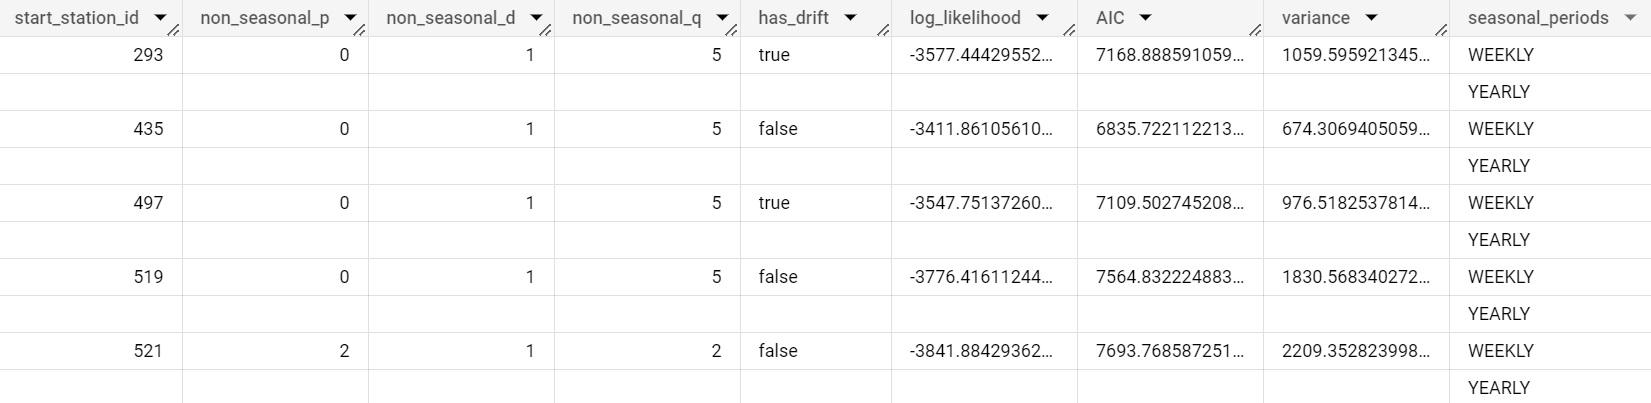

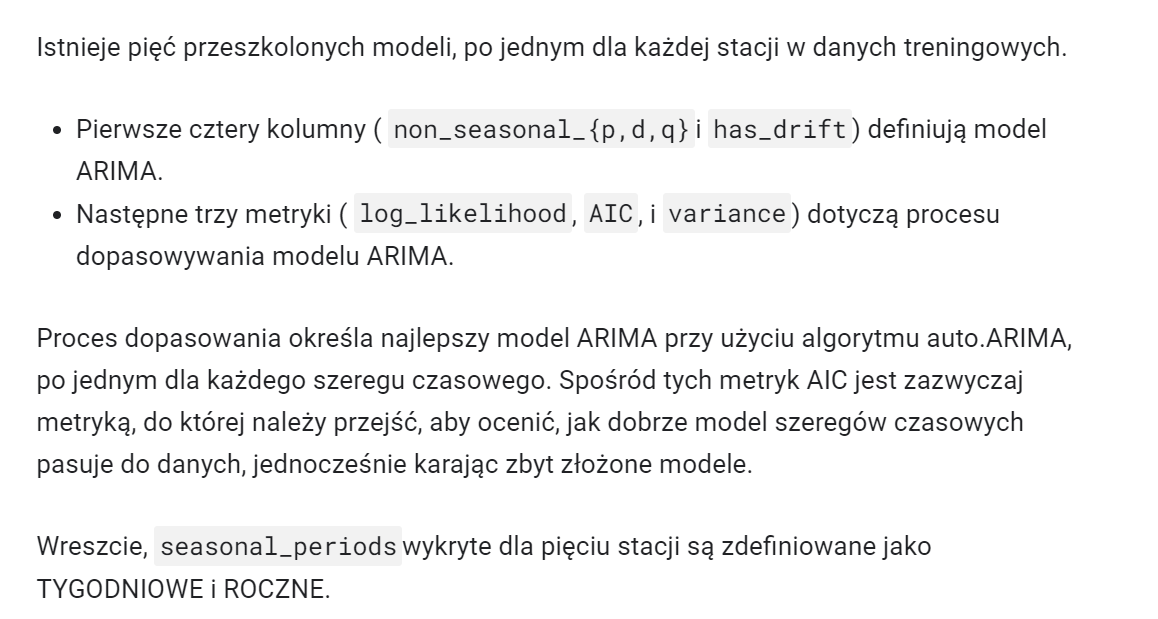

#Task 5. Make predictions using the model

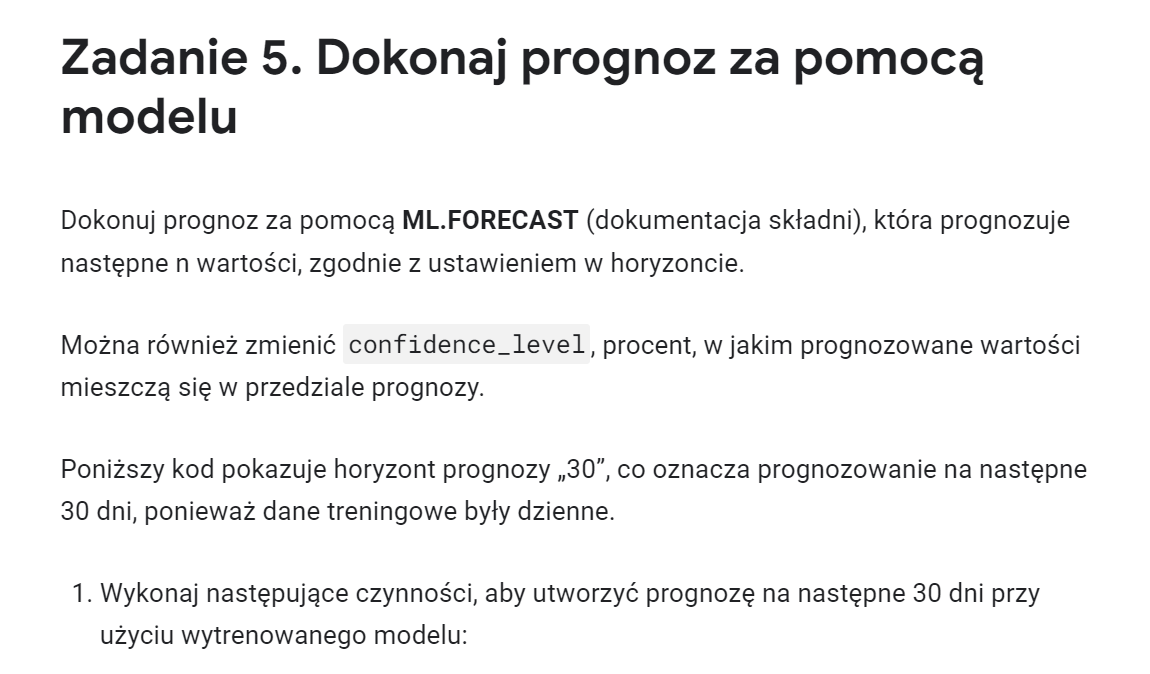

In [ ]:
%%bigquery

 DECLARE HORIZON STRING DEFAULT "30"; # number of values to forecast
 DECLARE CONFIDENCE_LEVEL STRING DEFAULT "0.90";

 EXECUTE IMMEDIATE format("""
     SELECT *
     FROM
       ML.FORECAST(MODEL bqmlforecast.bike_model,
                   STRUCT(%s AS horizon,
                          %s AS confidence_level)
                  )
     """, HORIZON, CONFIDENCE_LEVEL)

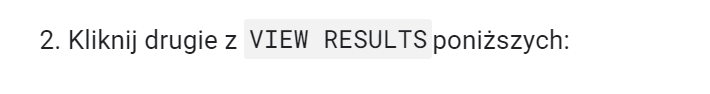

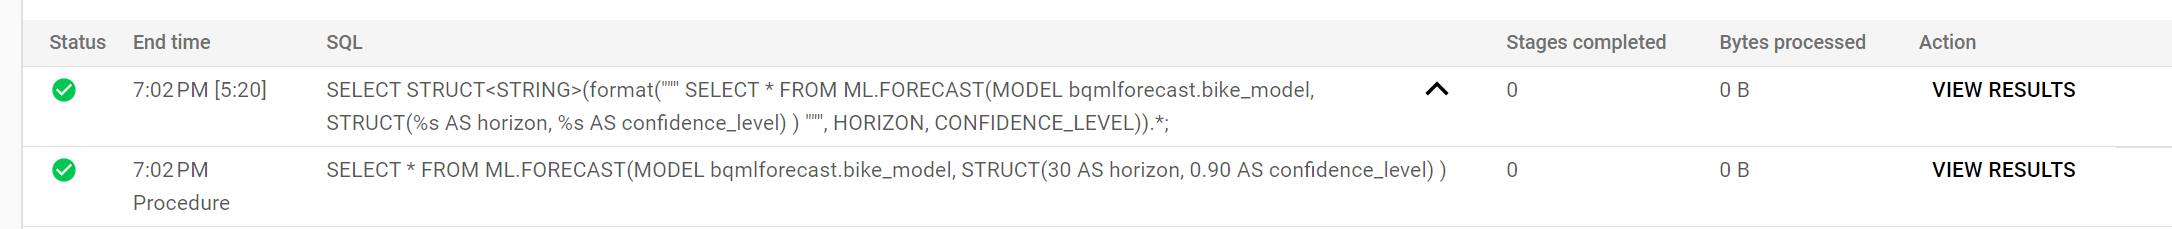

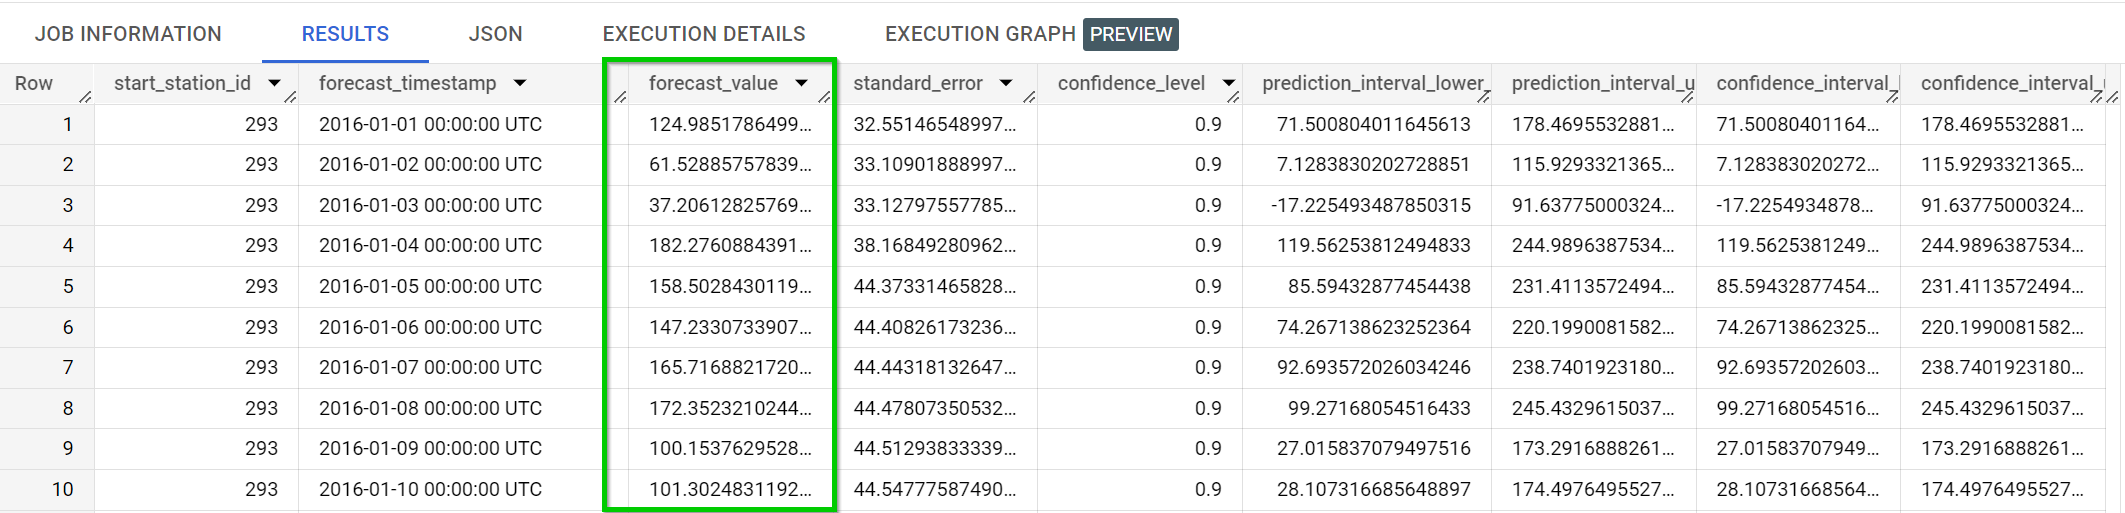

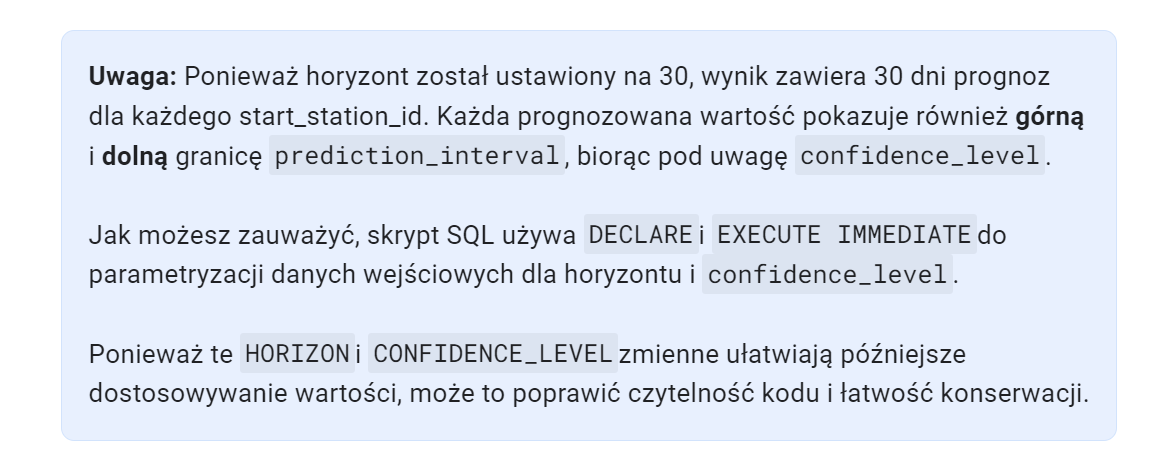

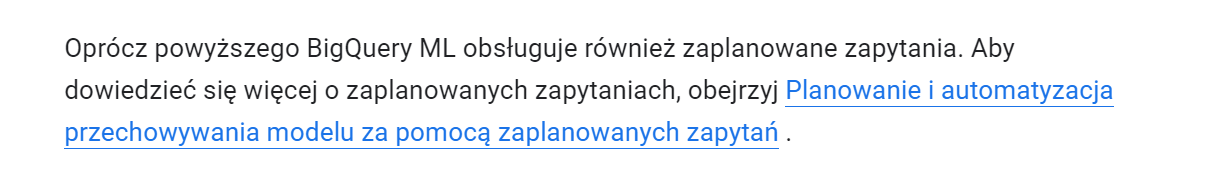

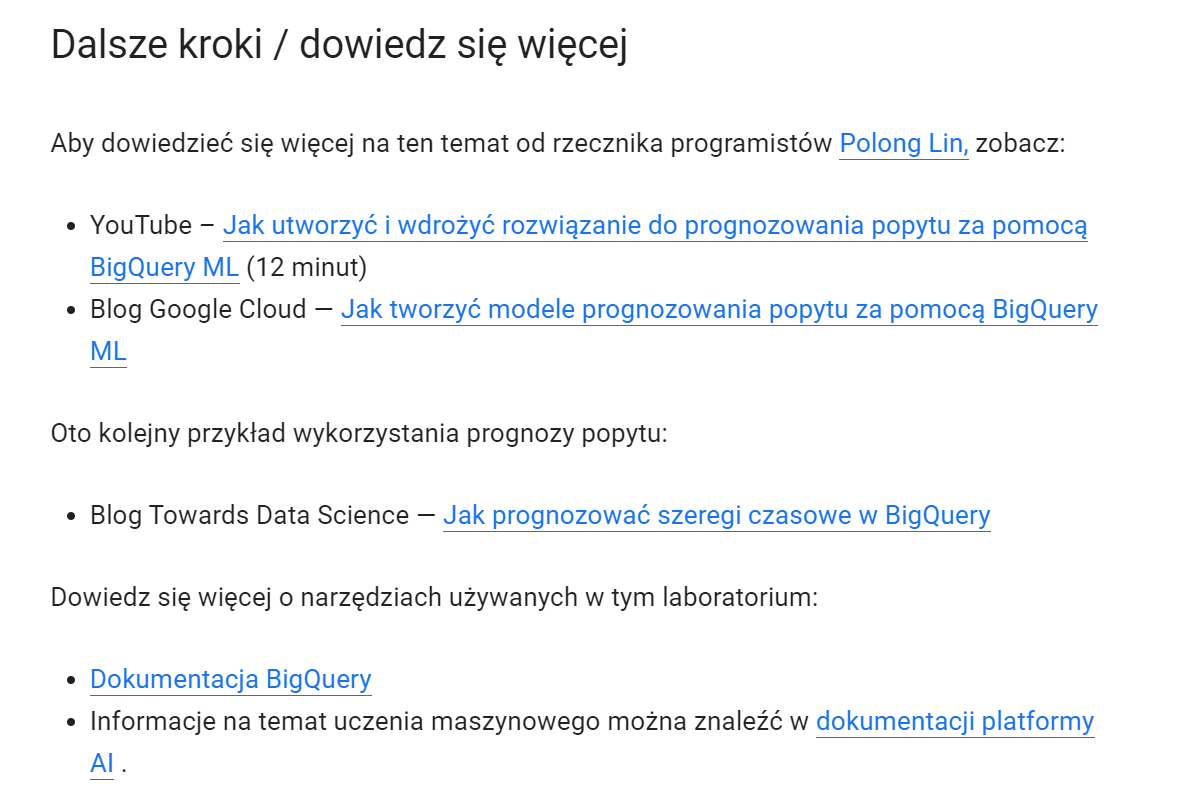

In [ ]:
# https://www.youtube.com/watch?v=dwOt68CevYA

# https://cloud.google.com/blog/topics/developers-practitioners/how-build-demand-forecasting-models-bigquery-ml

# https://cloud.google.com/bigquery/docs/